<a href="https://colab.research.google.com/github/krsmith/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [10]:
sales = [3505,2400,3017,2798,3700,3250,2689]

m = sum(sales) / len(sales)

varRes = sum([(xi - m)**2 for xi in sales]) / (len(sales) -1)
std = varRes**.5

print('Mean is', m)
print('Variance is', varRes)
print('Standard Deviation is',std)


Mean is 3051.285714285714
Variance is 214487.90476190473
Standard Deviation is 463.1283890692782


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [11]:
import numpy as np

cust = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales,cust)

print(covariance)



[[214487.9047619    7603.64285714]
 [  7603.64285714    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [14]:
mcust = sum(cust) / len(cust)
varcust = sum([(xi - mcust)**2 for xi in cust]) / (len(cust) -1)
stdcust = varcust**.5

print('Standard Deviation of customers is', stdcust)

divisionfactor = np.array([[std**2, std * stdcust], 
                          [std * stdcust, stdcust**2]])

corrcoef = np.divide(covariance, divisionfactor)

print('Correlation Coefficient is \n', corrcoef)

print('\nLibrary functions: \n', np.corrcoef(sales,cust))


Standard Deviation of customers is 17.057326313123664
Correlation Coefficient is 
 [[1.         0.96251908]
 [0.96251908 1.        ]]

Library functions: 
 [[1.         0.96251908]
 [0.96251908 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [19]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

#df.head()

df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [20]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

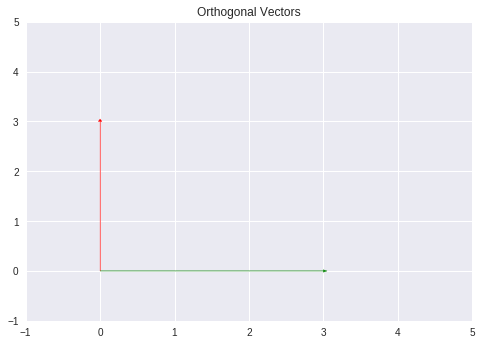

In [24]:
import matplotlib.pyplot as plt

#Synonym is perpendicular

vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [25]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a,b)

#Dot product does not equal 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [32]:
from numpy import linalg as LA

c = [2,-15,6,20]

print((LA.norm(c))**2)

print(np.dot(c,c))

print(np.dot(np.transpose(c),c))

#All of these are just the dot product of c & itself


665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8 \hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

\begin{align}
f = 4\hat{i} + 12\hat{i} + 11 \hat{i} + 9 \hat{i} + 2 \hat{i}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

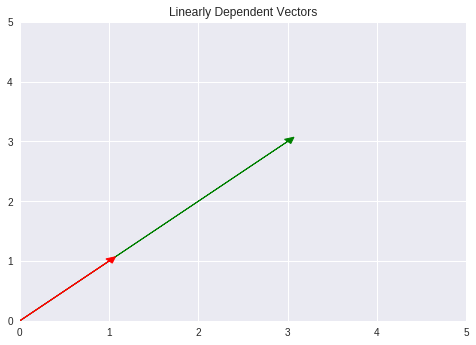

In [52]:
v1 = [1,1]
v2 = [3,3]

plt.xlim(0,5)
plt.ylim(0,5)

plt.arrow(0,0, v2[0], v2[1], linewidth=1, head_width=.1, head_length=.1, color='green')
plt.arrow(0,0, v1[0], v1[1], linewidth=1, head_width=.1, head_length=.1, color='red')

plt.title("Linearly Dependent Vectors")
plt.show()

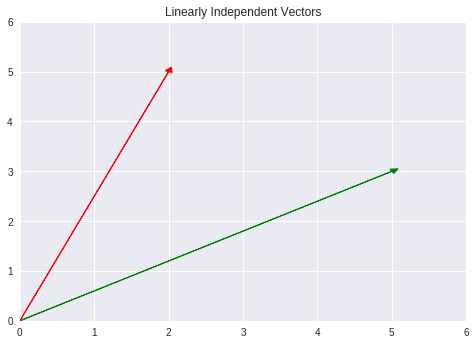

In [53]:
v1 = [2,5]
v2 = [5,3]

plt.xlim(0,6)
plt.ylim(0,6)

plt.arrow(0,0, v2[0], v2[1], linewidth=1, head_width=.1, head_length=.1, color='green')
plt.arrow(0,0, v1[0], v1[1], linewidth=1, head_width=.1, head_length=.1, color='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

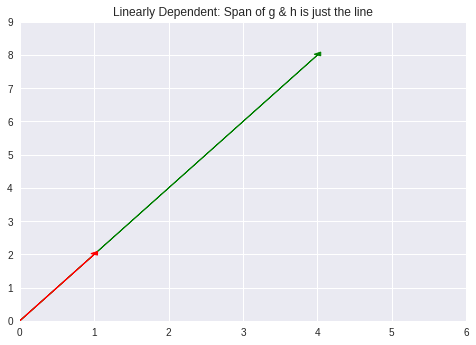

In [58]:
g = [1,2]
h = [4,8]

plt.xlim(0,6)
plt.ylim(0,9)

plt.arrow(0,0, h[0], h[1], linewidth=1, head_width=.1, head_length=.1, color='green')
plt.arrow(0,0, g[0], g[1], linewidth=1, head_width=.1, head_length=.1, color='red')

plt.title("Linearly Dependent: Span of g & h is just the line")
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

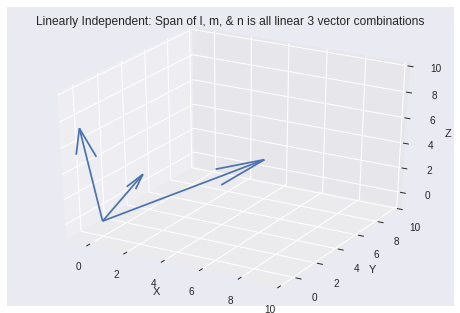

In [57]:
from mpl_toolkits.mplot3d import Axes3D

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Linearly Independent: Span of l, m, & n is all possible linear combinations")
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



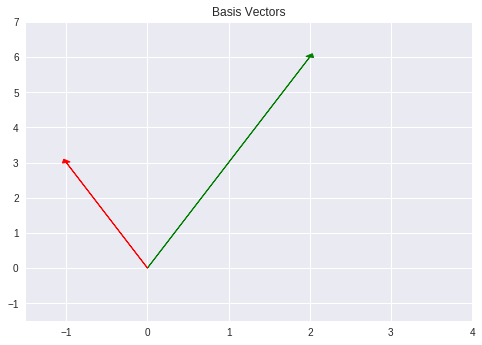

In [61]:
v1 = [-1,3]
v2 = [2,6]

plt.xlim(-1.5,4)
plt.ylim(-1.5,7)

plt.arrow(0,0, v2[0], v2[1], linewidth=1, head_width=.1, head_length=.1, color='green')
plt.arrow(0,0, v1[0], v1[1], linewidth=1, head_width=.1, head_length=.1, color='red')

plt.title("Basis Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis, the set of vectors must be linearly independent and span the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Add 1st row to 2nd row:

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Multiply 3rd row by 1/2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
2 & 4  & 1
\end{bmatrix}
\end{align}

Add -2 times the 1st row to the 3rd row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0  & -5
\end{bmatrix}
\end{align}

Multiply the 2nd row by 1/2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -5
\end{bmatrix}
\end{align}

Add 2nd row to 3rd row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 1  & 0
\end{bmatrix}
\end{align}

Add -2 times the 3rd row to the 1st row

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 3 \\
 0 & 1 & 5 \\
0 & 1  & 0
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

It tells what unit vectors the matrix can span.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [101]:
v = [1,3] 
w = [-1,2]

cv = np.dot(w,v)/np.dot(v,v)

print(cv)

0.5


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


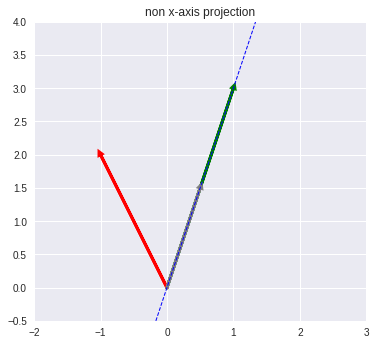

In [100]:
# Axis Bounds
plt.xlim(-2,3)          
plt.ylim(-.5,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(cv,v) 

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals #3 is y value of v

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

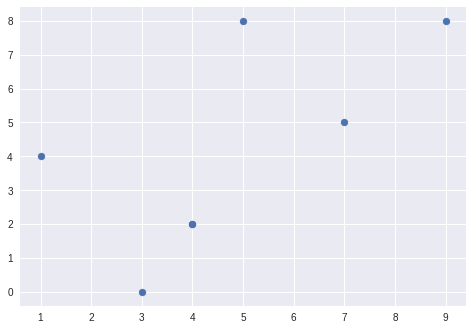

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()